# Bike Rental (Regression)

Import Libraries

In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

Load Dataset & take overview

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\ML DS\DataSets\hour.csv")
pd.set_option('display.max_columns',None)

In [3]:
data.shape

(17379, 17)

In [4]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Get Unique Value
data.apply(lambda x :len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [6]:
# Statistical Info

data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# DataType Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Preprocessing Data

In [8]:
# Check Null Value

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Rename The Feature

data=data.rename({"dteday":"date","yr":"year","mnth":"month","hr":"hours","weathersit":"weather","hum":"humidity","cnt":"count"},axis=1)

In [10]:
data.sample(5)

,instant,date,season,year,month,hours,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
15273,15274,2012-10-03,4,1,10,14,0,3,1,2,0.72,0.6818,0.70,0.1642,56,195,251
6584,6585,2011-10-06,4,0,10,22,0,4,1,1,0.46,0.4545,0.82,0.0000,24,124,148
3487,3488,2011-05-30,2,0,5,5,1,1,0,2,0.62,0.5455,0.94,0.1045,1,6,7
2397,2398,2011-04-14,2,0,4,19,0,4,1,1,0.54,0.5152,0.32,0.0000,37,222,259
2170,2171,2011-04-05,2,0,4,7,0,2,1,2,0.48,0.4697,0.88,0.3284,10,124,134


In [11]:
# Drop Unneccesary Feature
data=data.drop(columns=['instant',"date","year"],axis=1)

In [12]:
data.shape

(17379, 14)

In [13]:
# get columns
column_list=(data.columns)
list2=['season',
 'month',
 'hours',
 'holiday',
 'weekday',
 'workingday',
 'weather',]


In [14]:
# Change int to category

for col in list2:
    data[col]=data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   month       17379 non-null  category
 2   hours       17379 non-null  category
 3   holiday     17379 non-null  category
 4   weekday     17379 non-null  category
 5   workingday  17379 non-null  category
 6   weather     17379 non-null  category
 7   temp        17379 non-null  float64 
 8   atemp       17379 non-null  float64 
 9   humidity    17379 non-null  float64 
 10  windspeed   17379 non-null  float64 
 11  casual      17379 non-null  int64   
 12  registered  17379 non-null  int64   
 13  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


EDA

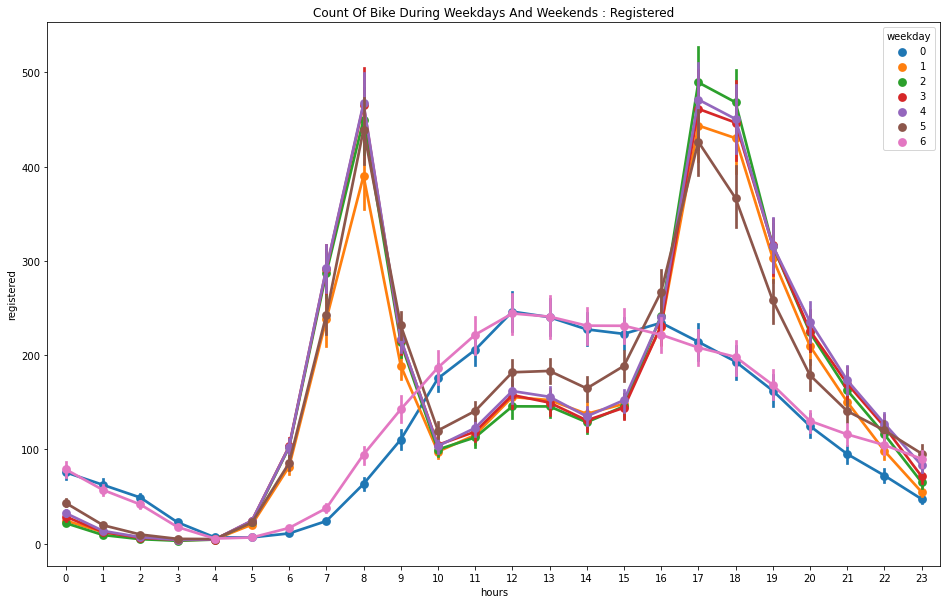

In [15]:
fig , ax = plt.subplots(figsize=(16,10))
sns.pointplot(data=data,x="hours",y='registered',hue='weekday')
ax.set(title="Count Of Bike During Weekdays And Weekends : Registered")
plt.show()

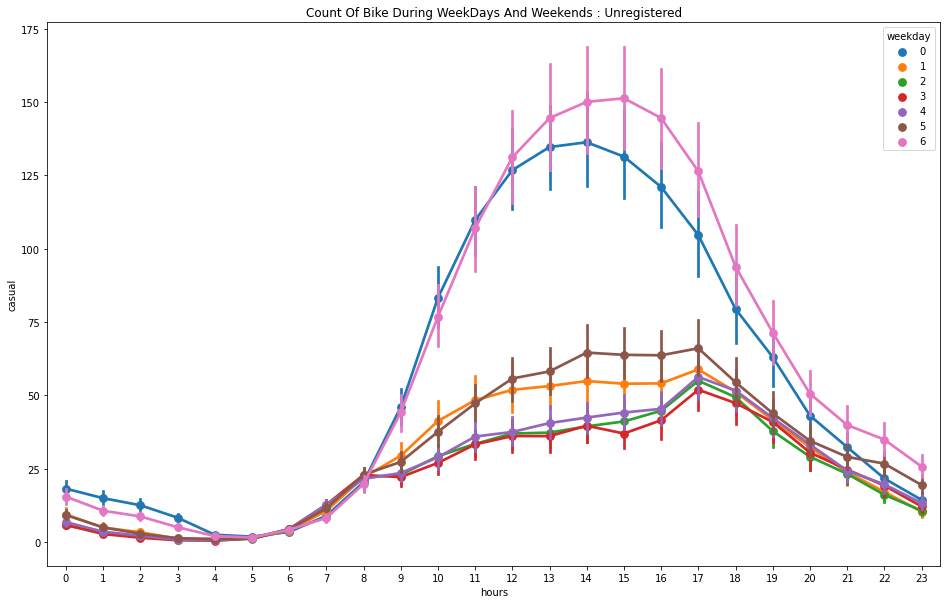

In [16]:
fig , ax =plt.subplots(figsize=(16,10))
sns.pointplot(data=data,x='hours',y='casual',hue='weekday')
ax.set(title="Count Of Bike During WeekDays And Weekends : Unregistered")
plt.show()

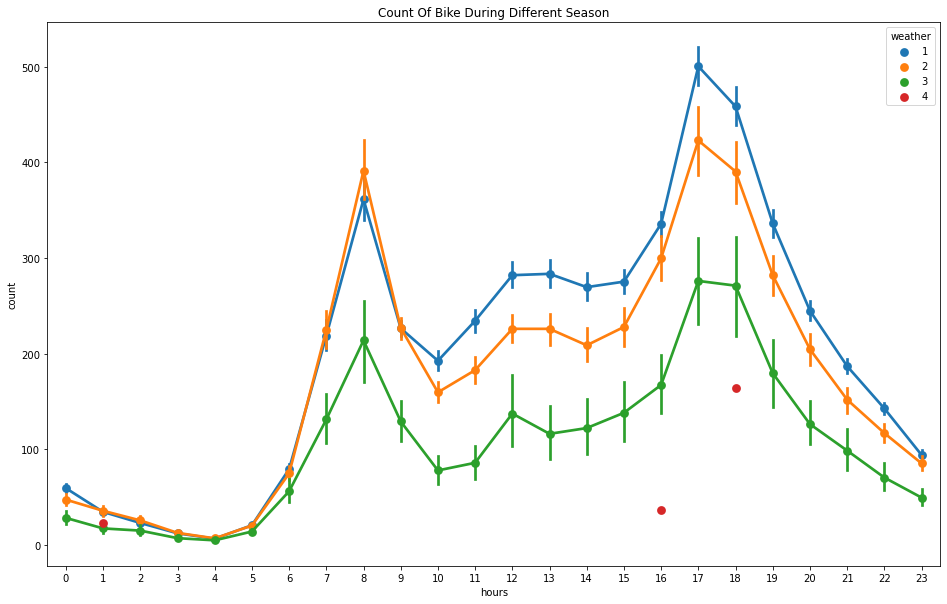

In [17]:
fig,ax=plt.subplots(figsize=(16,10))
sns.pointplot(data=data,x='hours',y='count',hue='weather')
ax.set(title="Count Of Bike During Different Season")
plt.show()

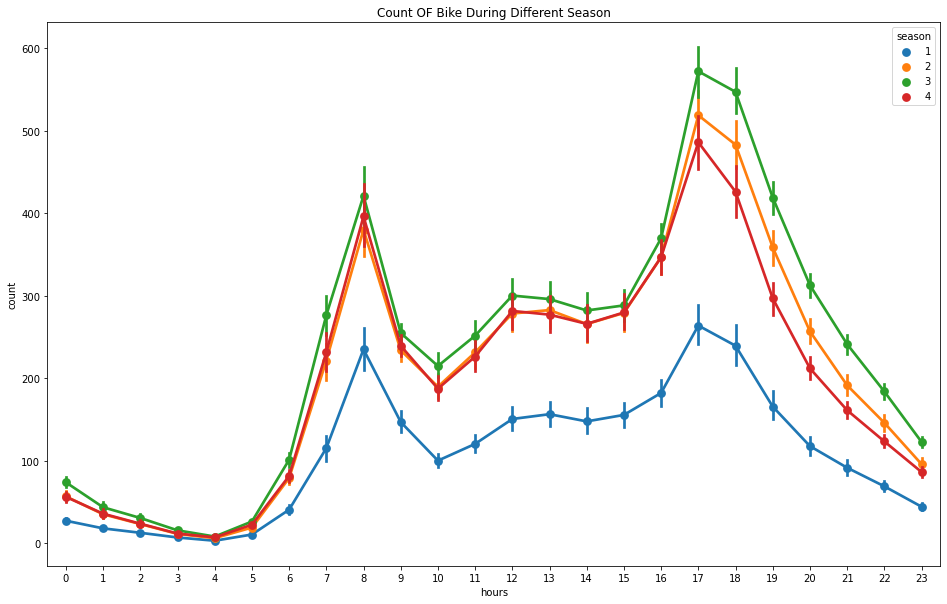

In [18]:
fig,ax=plt.subplots(figsize=(16,10))
sns.pointplot(data=data,x='hours',y='count',hue='season')
ax.set(title="Count OF Bike During Different Season")
plt.show()

[Text(0.5, 1.0, 'Count Of Bikes During Different Months')]

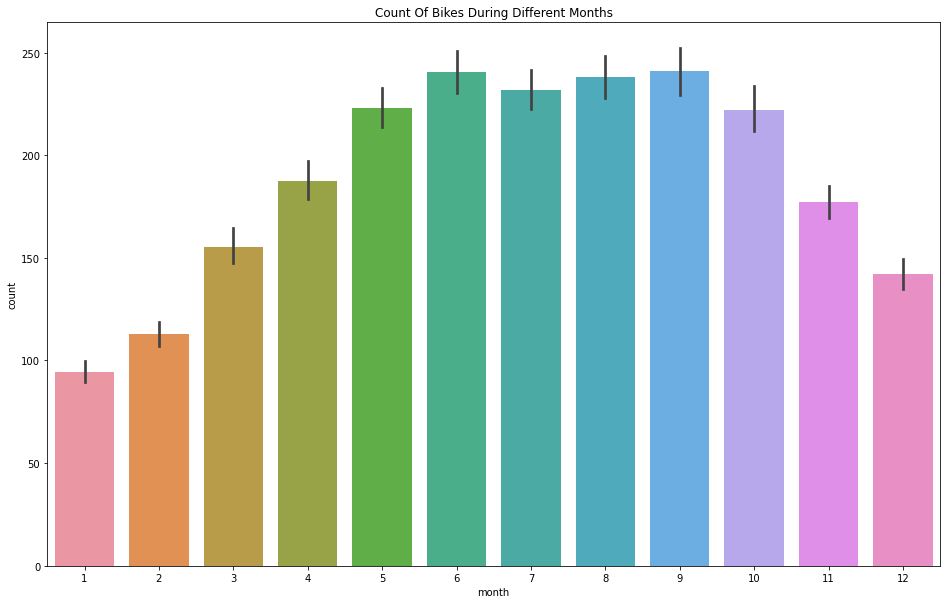

In [19]:
fig , ax=plt.subplots(figsize=(16,10))
sns.barplot(data=data,x='month',y='count',)
ax.set(title='Count Of Bikes During Different Months')

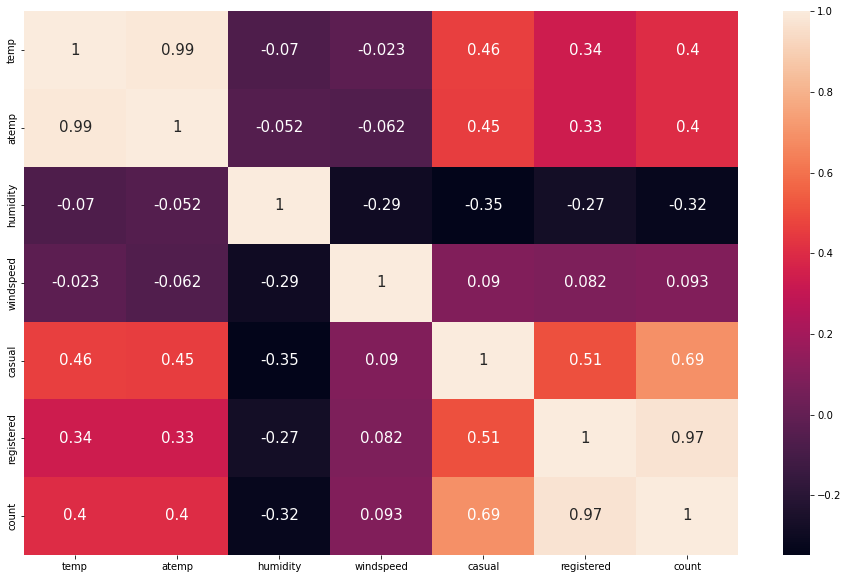

In [20]:
corr = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,annot_kws={'size':15})
plt.show()

[Text(0.5, 1.0, 'Relation Between Humidity And Count')]

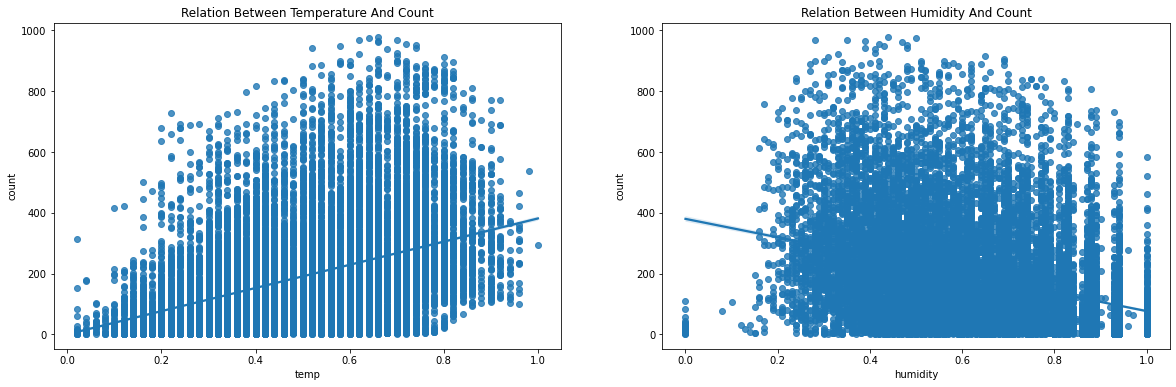

In [21]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,6))
sns.regplot(x=data['temp'],y=data['count'],ax=ax1)
ax1.set(title="Relation Between Temperature And Count")
sns.regplot(x=data['humidity'],y=data['count'],ax=ax2)
ax2.set(title='Relation Between Humidity And Count')


In [24]:
data['count']=np.log(data['count'])

One Hot Encoding

In [27]:
data.sample(5)

,season,month,hours,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
248,1,1,17,0,2,1,2,0.16,0.1515,0.86,0.2239,6,130,4.912655
574,1,1,5,0,3,1,3,0.20,0.1818,0.86,0.2836,0,1,0.000000
3828,2,6,10,0,1,1,1,0.64,0.6212,0.41,0.3284,38,80,4.770685
1239,1,2,18,0,4,1,2,0.34,0.3030,0.87,0.3284,5,132,4.919981
706,1,2,19,0,2,1,2,0.24,0.2424,0.81,0.1343,3,105,4.682131


In [34]:
colss=['season','month','hours','holiday','weekday','workingday',"weather"]
data_oh=data
def one_hot_encoding(data,column):
    data=pd.concat([data,pd.get_dummies(data[column],prefix=column,drop_first=True)],axis=1)
    data=data.drop([column],axis=1)
    return data

for col in colss:
    data_oh=one_hot_encoding(data_oh,col)
    
data_oh.head()
    

,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hours_1,hours_2,hours_3,hours_4,hours_5,hours_6,hours_7,hours_8,hours_9,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.2879,0.81,0.0,3,13,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.22,0.2727,0.80,0.0,8,32,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.22,0.2727,0.80,0.0,5,27,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.24,0.2879,0.75,0.0,3,10,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.24,0.2879,0.75,0.0,0,1,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [38]:
X=data_oh.drop(['atemp','windspeed','casual','registered','count'],axis=1)
y=data_oh['count']

In [39]:
print("X" , X.shape)
print("y" , y.shape)

X (17379, 50)
y (17379,)


In [45]:
from sklearn.model_selection  import train_test_split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=45)

In [47]:
from sklearn.linear_model import LinearRegression ,Ridge ,HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , ExtraTreesRegressor

In [48]:
models=[LinearRegression(),
       Ridge(),
       HuberRegressor(),
       ElasticNetCV(),
       DecisionTreeRegressor(),
       RandomForestRegressor(),
       GradientBoostingRegressor(),
       ExtraTreesRegressor()]

In [49]:
for col in models:
    col.fit(X_train,y_train)
    print(col,col.score(X_test,y_test)*100)

LinearRegression() 79.05946466660131
Ridge() 79.07085025560107
HuberRegressor() 78.11770098546953
ElasticNetCV() 79.08077078018759
DecisionTreeRegressor() 80.26841281872201
RandomForestRegressor() 88.95057606849083
GradientBoostingRegressor() 82.4668907039278
ExtraTreesRegressor() 89.0204503540933


# ExtraTreesRegressor  89.02 %

Done